# Student Performance Indicator

## Life cycle of Machine Learning Project

 - Understand the Problem Statement
 - Data collection
 - Data Checks to Perform
 - Exploratory Data Analysis (EDA)
 - Data Pre-processing
 - Model Training
 - Choose the best model


## 1) Problem Statement

 - This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, etc.

## 2) Data Collection

 - Data source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
 - Data consists of 8 columns and 1000 rows

### 2.1. Import Data and Required packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
# show top 5 rows

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# shape of the dataset

df.shape   # 8 columns 1000 rows

(1000, 8)

### 2.2. Dataset Information

 - Gender: Male/Female
 - Race/Ethnicity: A, B, C, D, E
 - Parental Level of Education: Bachelor's, Master's, Associate's, High school
 - Lunch: lunch before test- standard or free/reduced
 - test preparation course: completed or not completed before test
 - math score
 - reading score
 - writing score

## 3) Data Checks to Perform

- Check missing values
- check duplicates
- check data types
- check the number of unique values of each column
- check statistics of each column
- check categories in categorical column

### 3.1. Missing Values

In [8]:
df.isna().sum()  # no missing values observed

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 3.2. Duplicates

In [11]:
df.duplicated().sum()  # no duplicates found

0

### 3.3. Data Types of each column

In [13]:
df.info()  # 5 categorical and 3 integer columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4. Unique values

In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5. Check statistics of each column

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**From above it can be observed that**
- Math score ranges from 0 to 100, reading score ranges from 17 to 100, and writing score ranges from 10 to 100
- All standard deviation values are close, between 14.6 to 15.19
- All means are close, between 66 to 69

### 3.6. Exploring Categoriacal Data

In [20]:
print("Categories in 'gender' variable are: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable are: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable are: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable are: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable are: ", end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable are:  ['female' 'male']
Categories in 'race/ethnicity' variable are:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable are:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable are:  ['none' 'completed']


In [25]:
# define numerical and categorical columns

numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

# print columns

print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7. Adding "Total Score" and "Average" columns - Feature engineering

In [26]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
# No.of students with full marks

math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

print(f'Number of students with full marks in math: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [29]:
# No.of students with marks <= 20

math_less_than_20 = df[df['math score'] <= 20]['average'].count()
reading_less_than_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_than_20 = df[df['writing score'] <= 20]['average'].count()

print(f'Number of students with marks less than 20 in math: {math_less_than_20}')
print(f'Number of students with marks less than 20 in reading: {reading_less_than_20}')
print(f'Number of students with marks less than 20 in writing: {writing_less_than_20}')

Number of students with marks less than 20 in math: 4
Number of students with marks less than 20 in reading: 1
Number of students with marks less than 20 in writing: 3


**From above, it can be observed that**

- Students have performed worst in maths and best in reading

## 4) Data Visualization

 - Histograms
 - Kernel Distribution Function (KDE)

### 4.1. Histograms & KDE

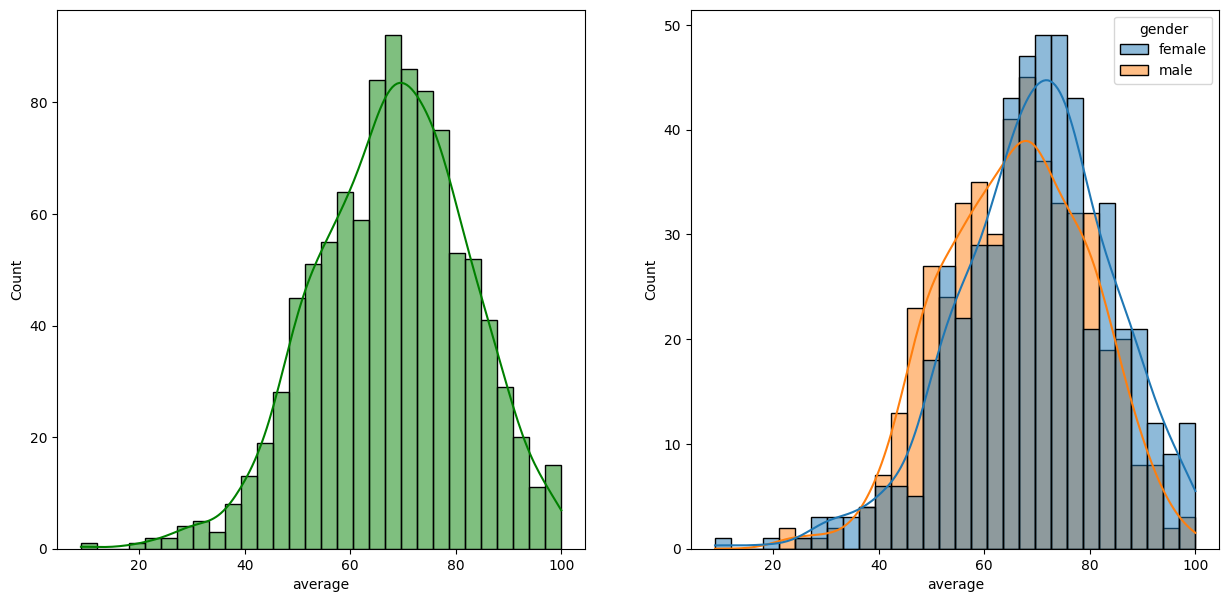

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')  # female students tend to perform better
plt.show()

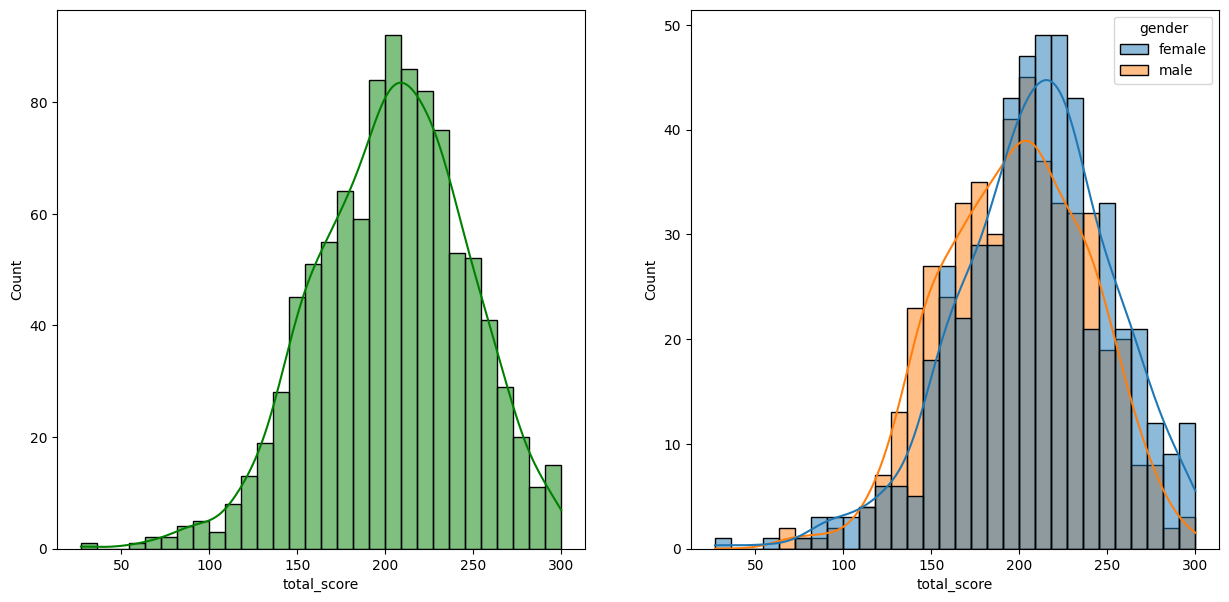

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')  # female students tend to perform better
plt.show()

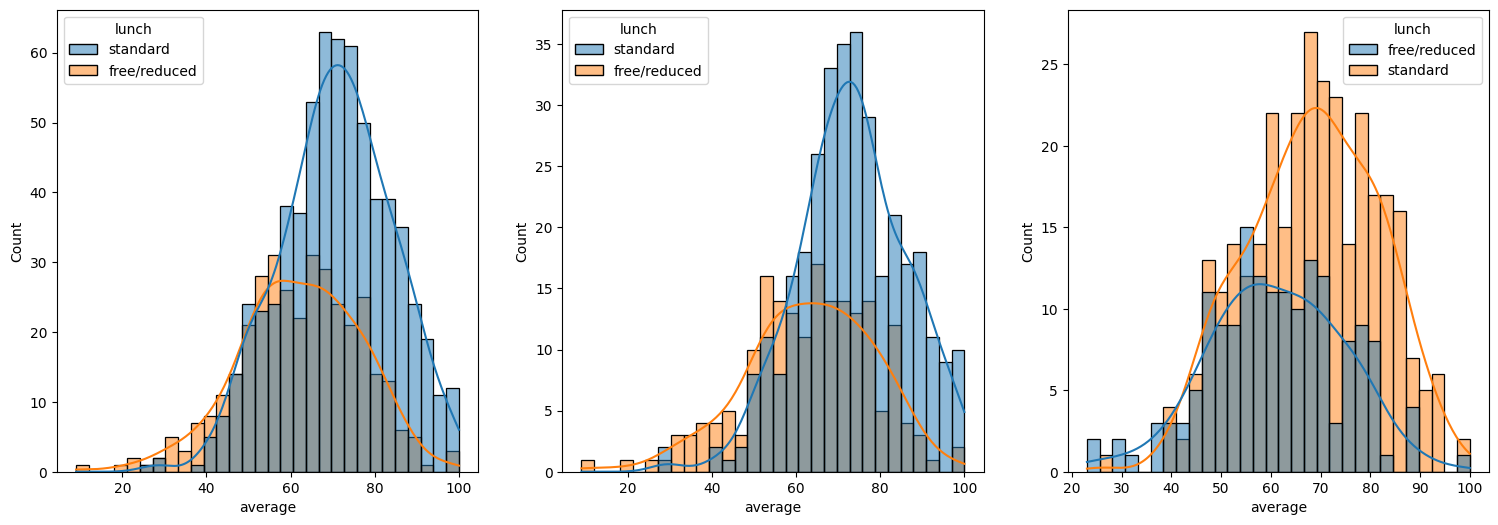

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='lunch')
plt.show()

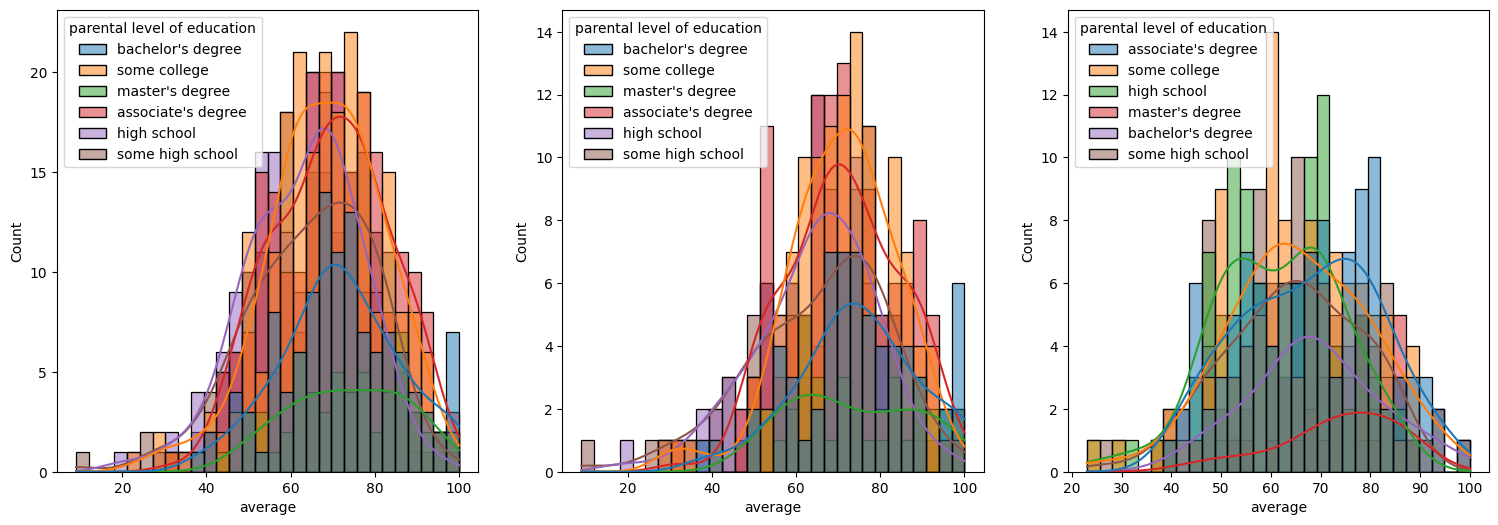

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', bins=30, kde=True, hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='parental level of education')
plt.show()

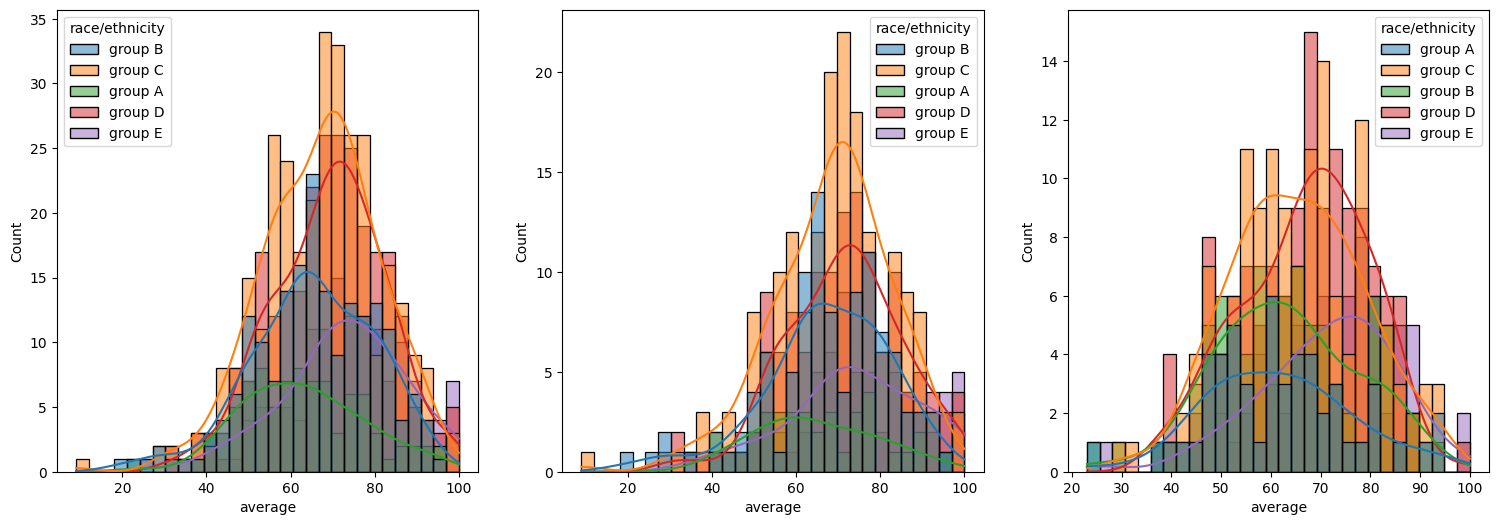

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', bins=30, kde=True, hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='race/ethnicity')
plt.show()

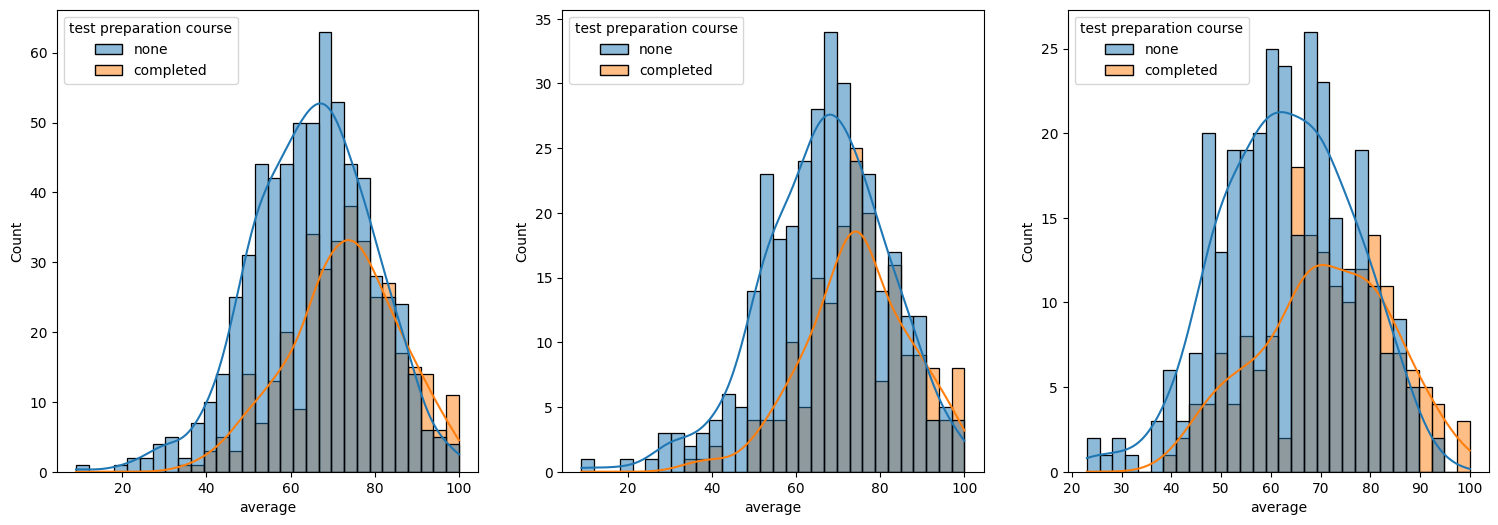

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', bins=30, kde=True, hue='test preparation course')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='test preparation course')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='test preparation course')
plt.show()

### 4.2. Maximum score of students in all three subjects

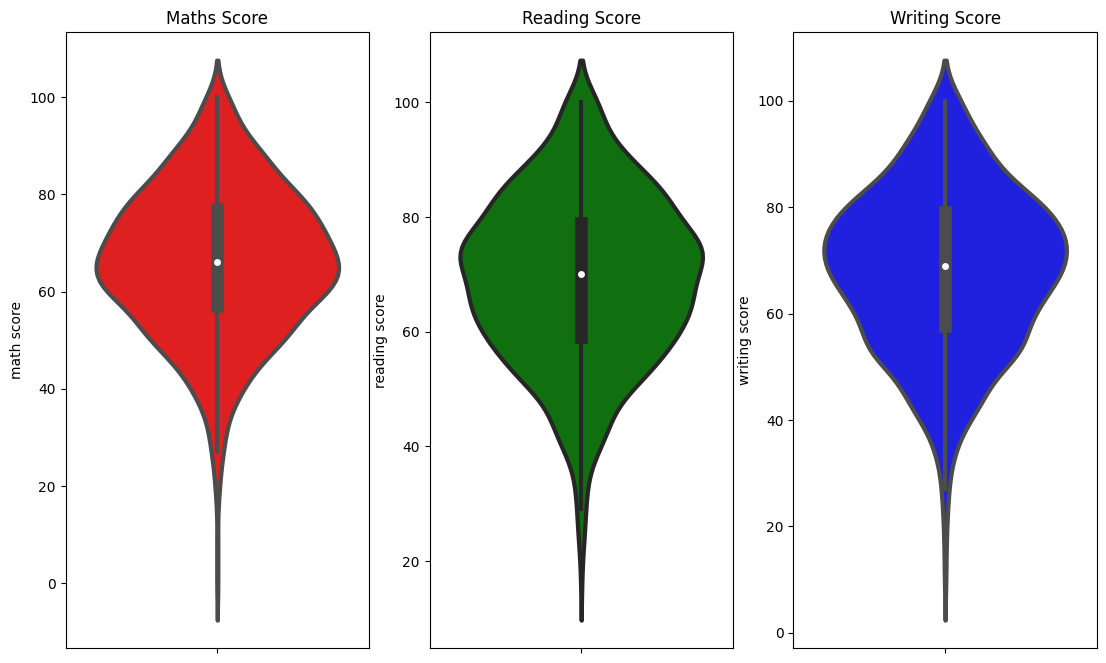

In [41]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Maths Score')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Score')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Score')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

**Insights**
 - From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3. Multivariate analysis using pieplot

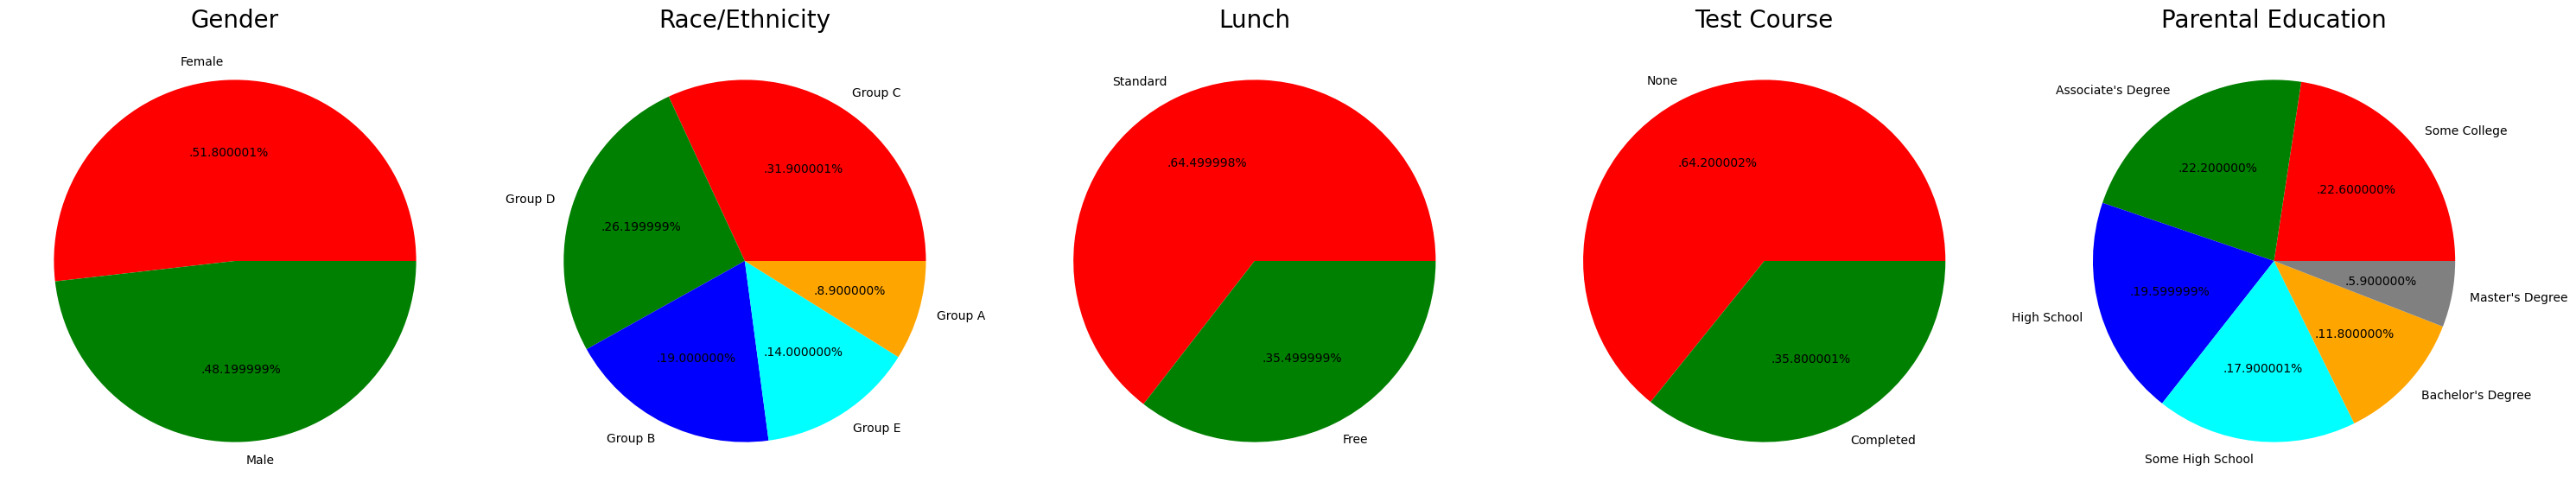

In [42]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insights**
 - Number of Male and Female students is almost equal
 - Number students are greatest in Group C
 - Number of students who have standard lunch are greater
 - Number of students who have not enrolled in any test preparation course is greater
 - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## 4.4 Feature wise Visualization

### 4.4.1. Gender

 - Distribution of Gender
 - Impact of Gender on student performance

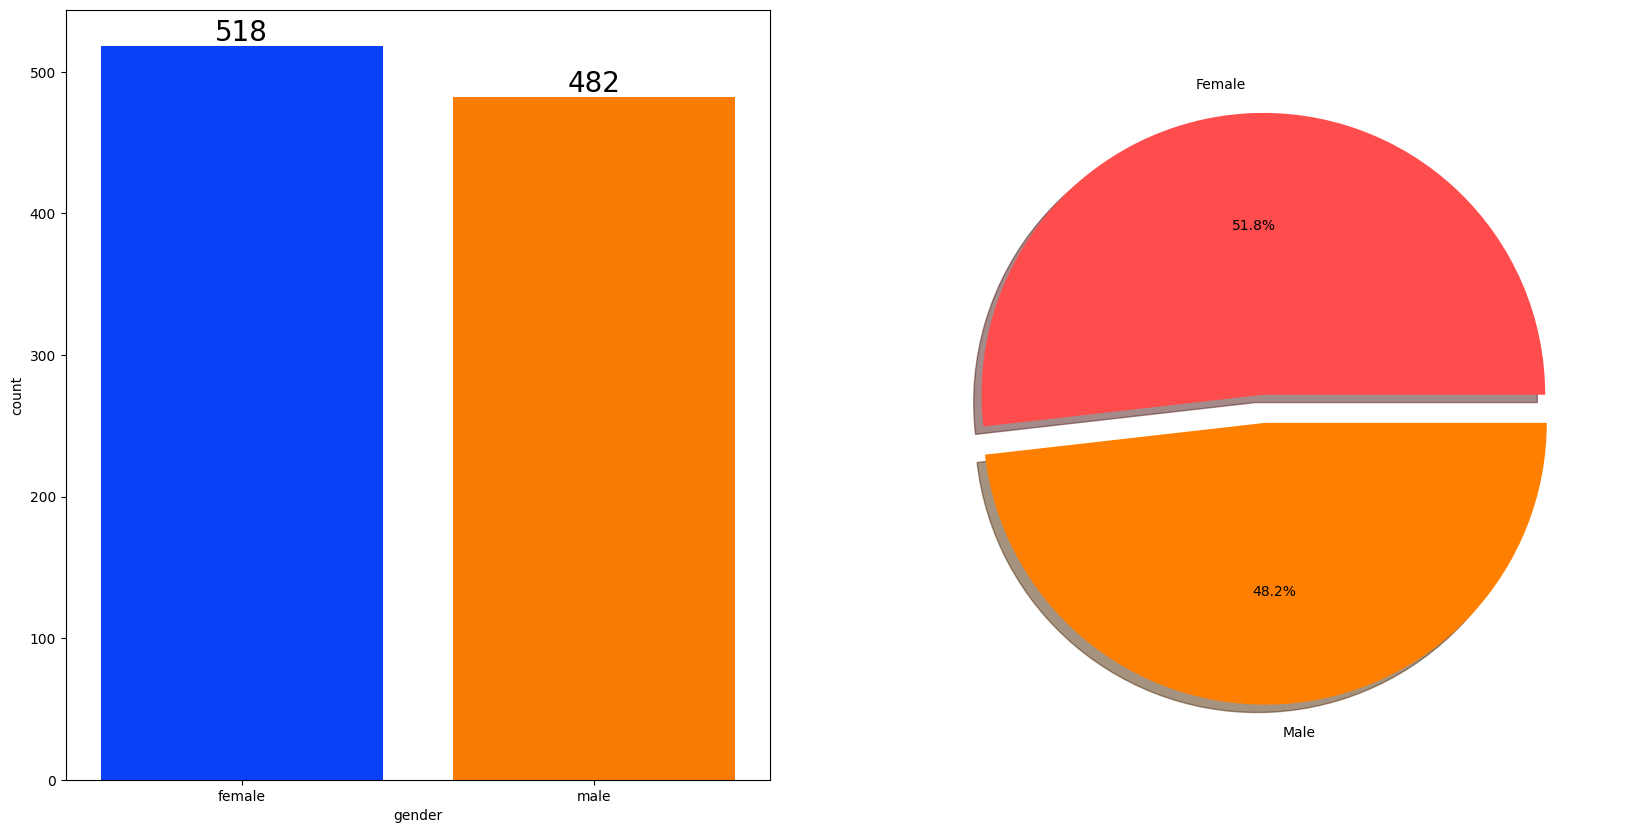

In [45]:
# Univariate Analysis (Distribution of Gender)

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#df['gender'].value_counts()

**Insights**
 - The male (48%) and female (52%) students count is similar

In [51]:
# Bivariate Analysis (Impact of Gender on student performance)

gender_group = df.groupby('gender').mean('average')
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


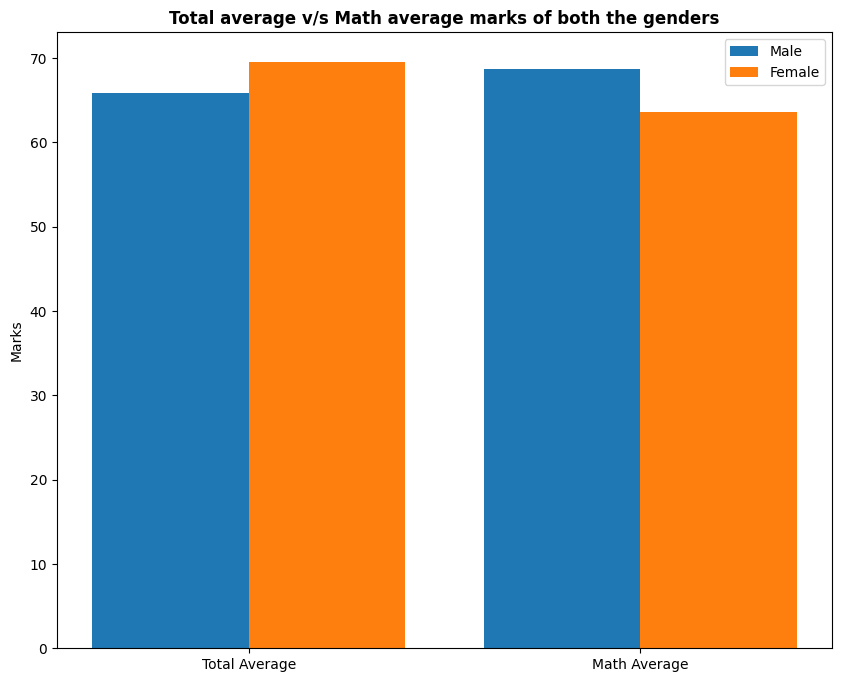

In [53]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**

 - Females have a better overall performance, however, males have performed better in maths

### 4.4.2 Race/Ethnicity

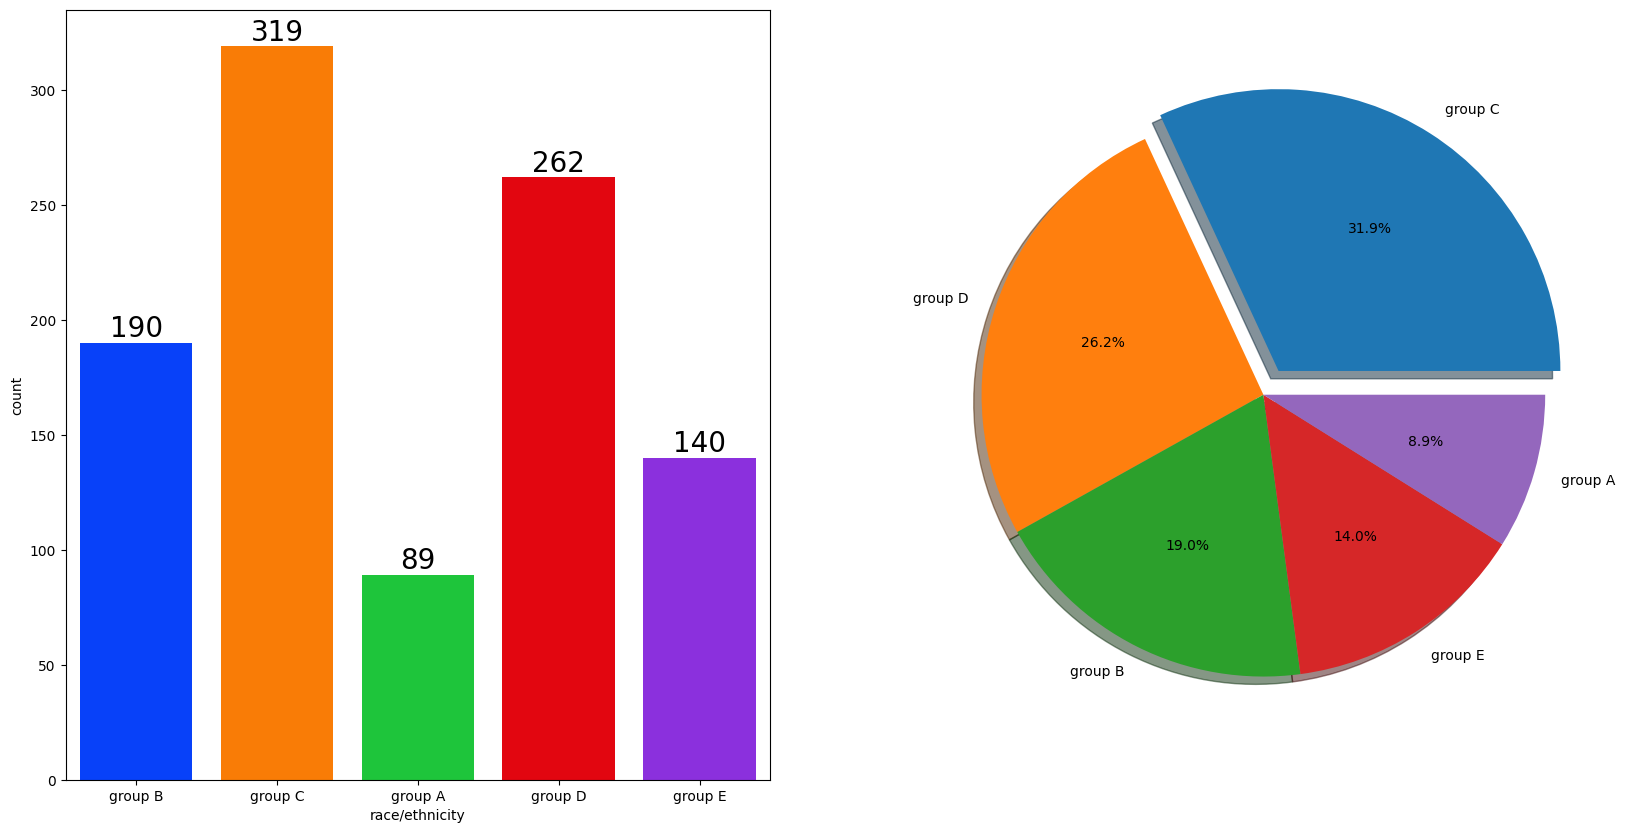

In [55]:
# Univariate Analysis (Distribution of race/thnicity)

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

**Insights**

 - Majority -> Group C, Group D, Group B, Group E, Group A

In [56]:
# Bivariate Analysis (Impact of race/ethnicity on student performance)

race_group = df.groupby('race/ethnicity').mean('average')
race_group

,math score,reading score,writing score,total_score,average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


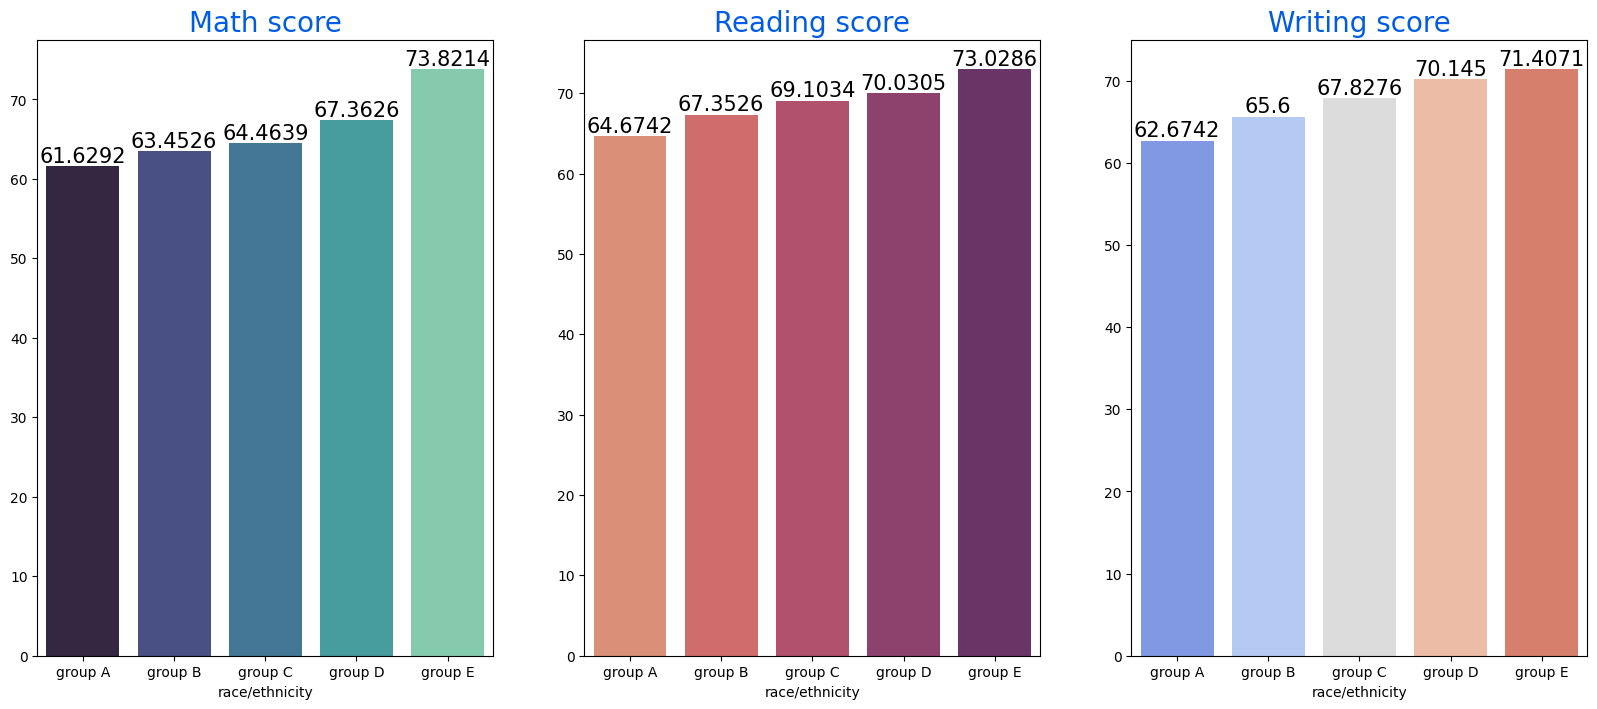

In [57]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**

 - Group E has a better overall performance (mean) with a significantly better performance compared to all other groups in maths
 - Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 Parental level of education

In [62]:
df['parental level of education']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object

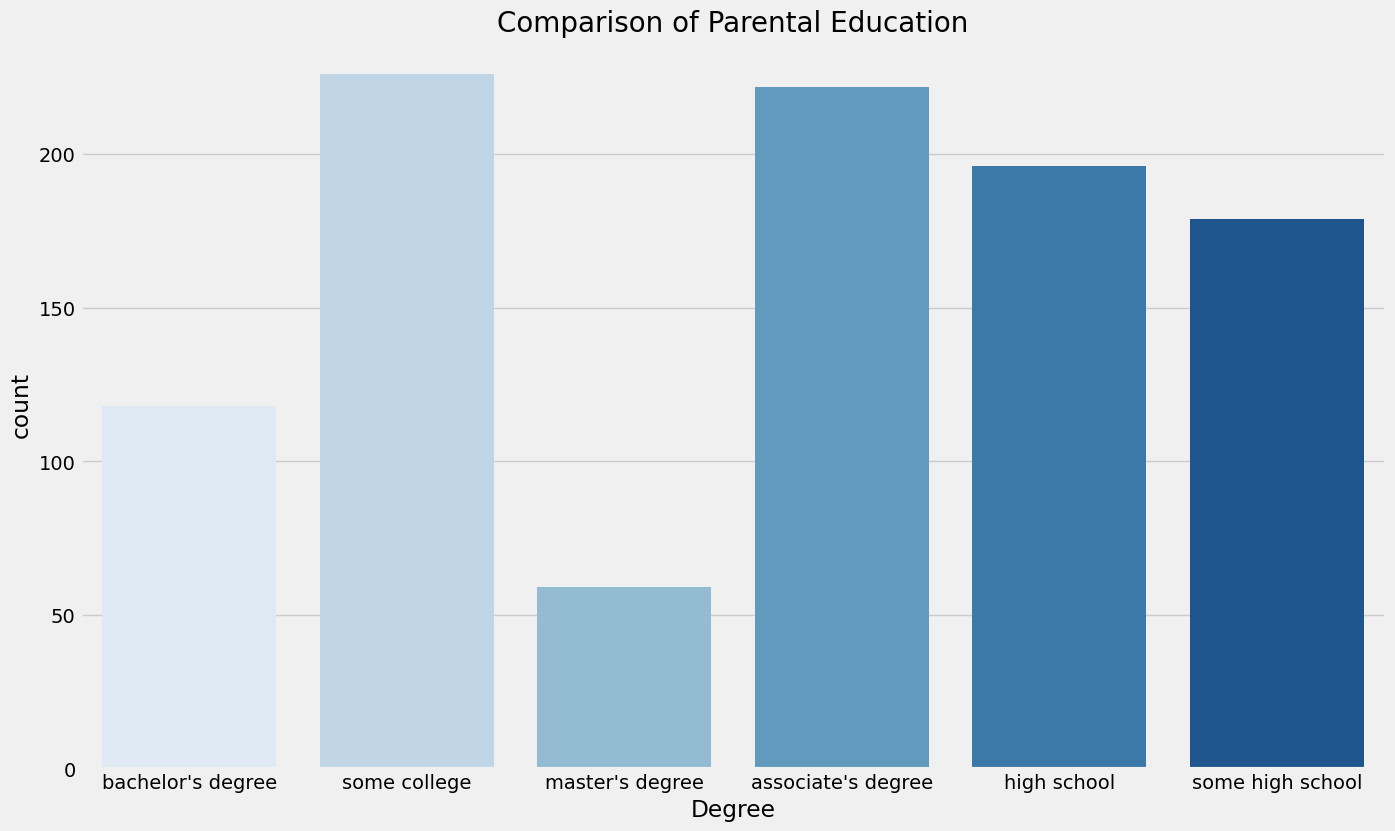

In [65]:
# Univariate analysis ()

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x = df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insights**
 - Majority of the students have parents with "some college" leve of education followed by parents with an associate's degree
 - Very few students have parents with a master's degree

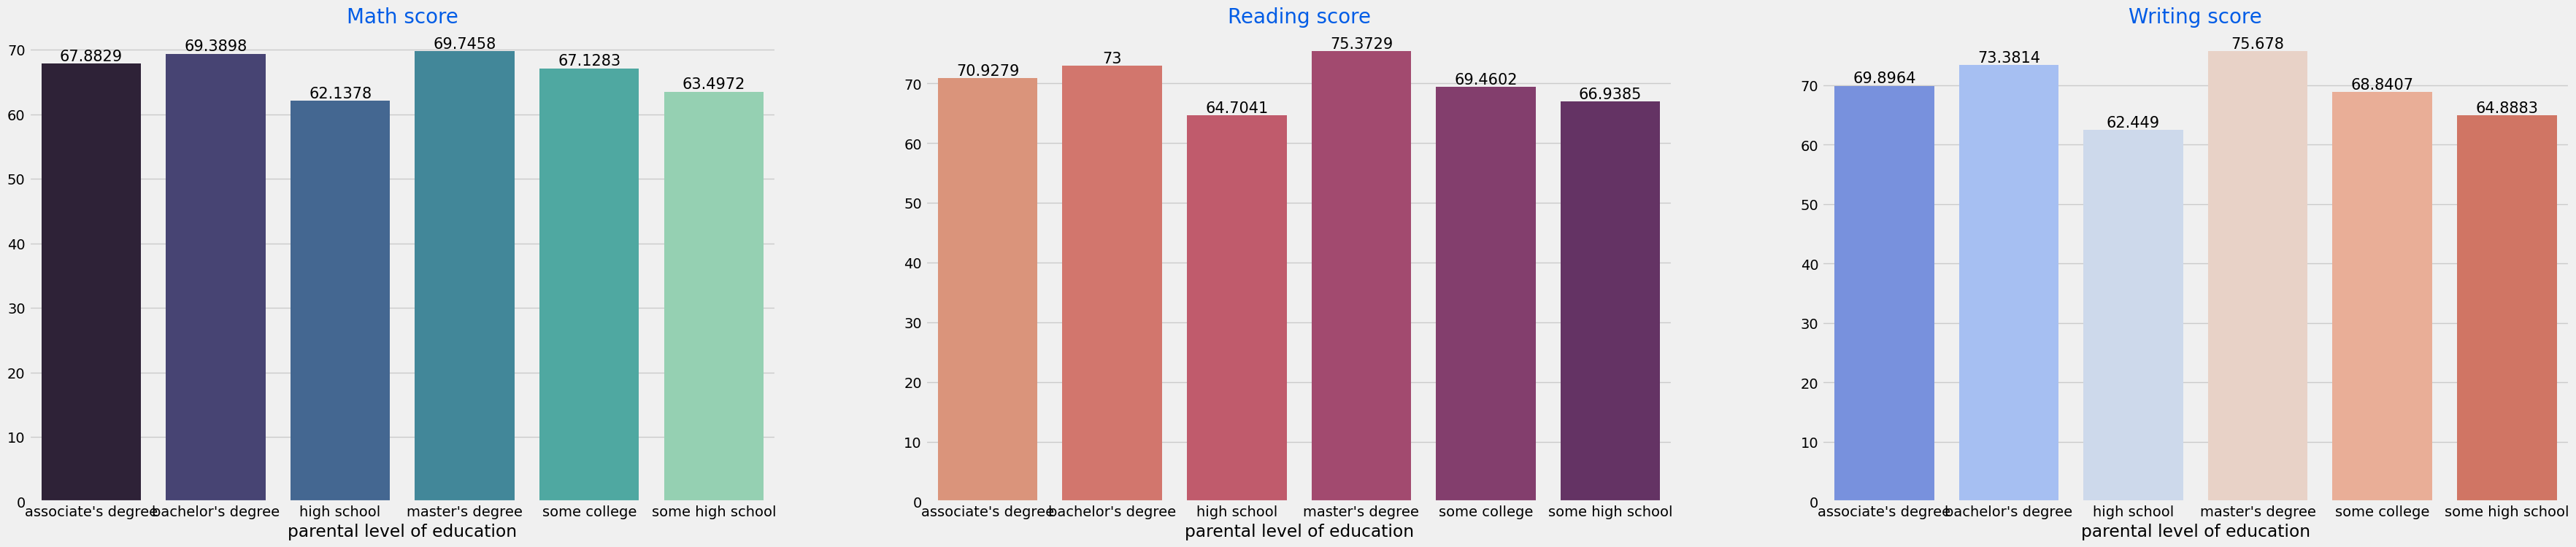

In [70]:
# Bivariate analysis (Imapct of parental education on student performance)

Group_data3=df.groupby('parental level of education')

f,ax=plt.subplots(1,3,figsize=(40,8))
sns.barplot(x=Group_data3['math score'].mean().index,y=Group_data3['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading score'].mean().index,y=Group_data3['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing score'].mean().index,y=Group_data3['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
 - Students of parents with "master's degree" tend to perform better overall compared to others
 - Students of parents with "high school" level of education perforem the worst across all subjects 

### 4.4.4. LUNCH

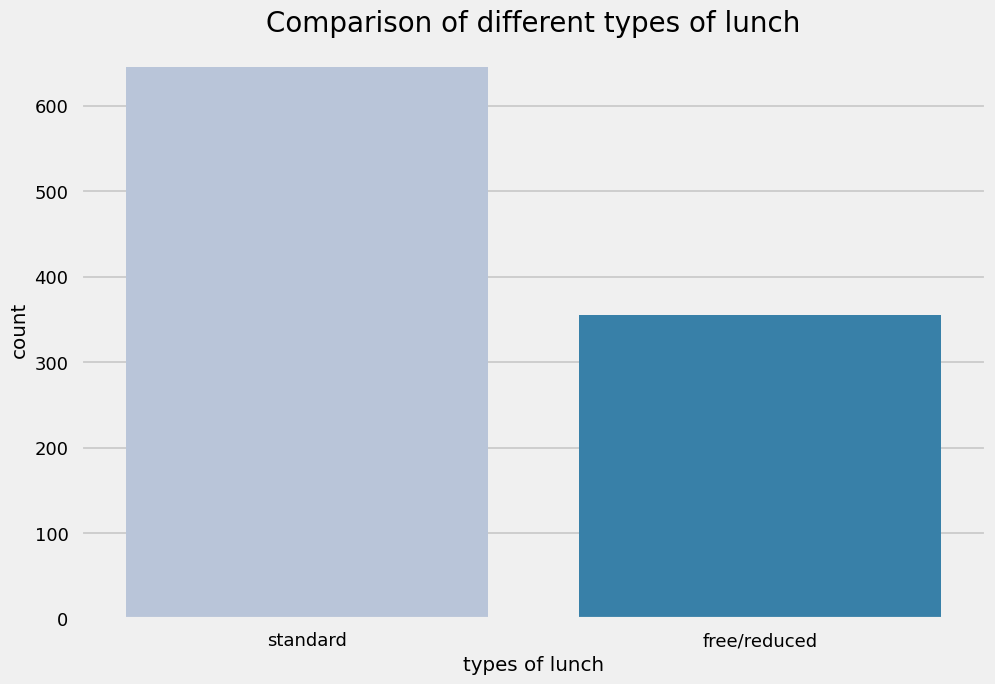

In [72]:
# Univariate Analysis (Distribution of Lunch column)

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-talk')
sns.countplot(x = df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Insights**
 - Majority of the students are on the standard lunch program

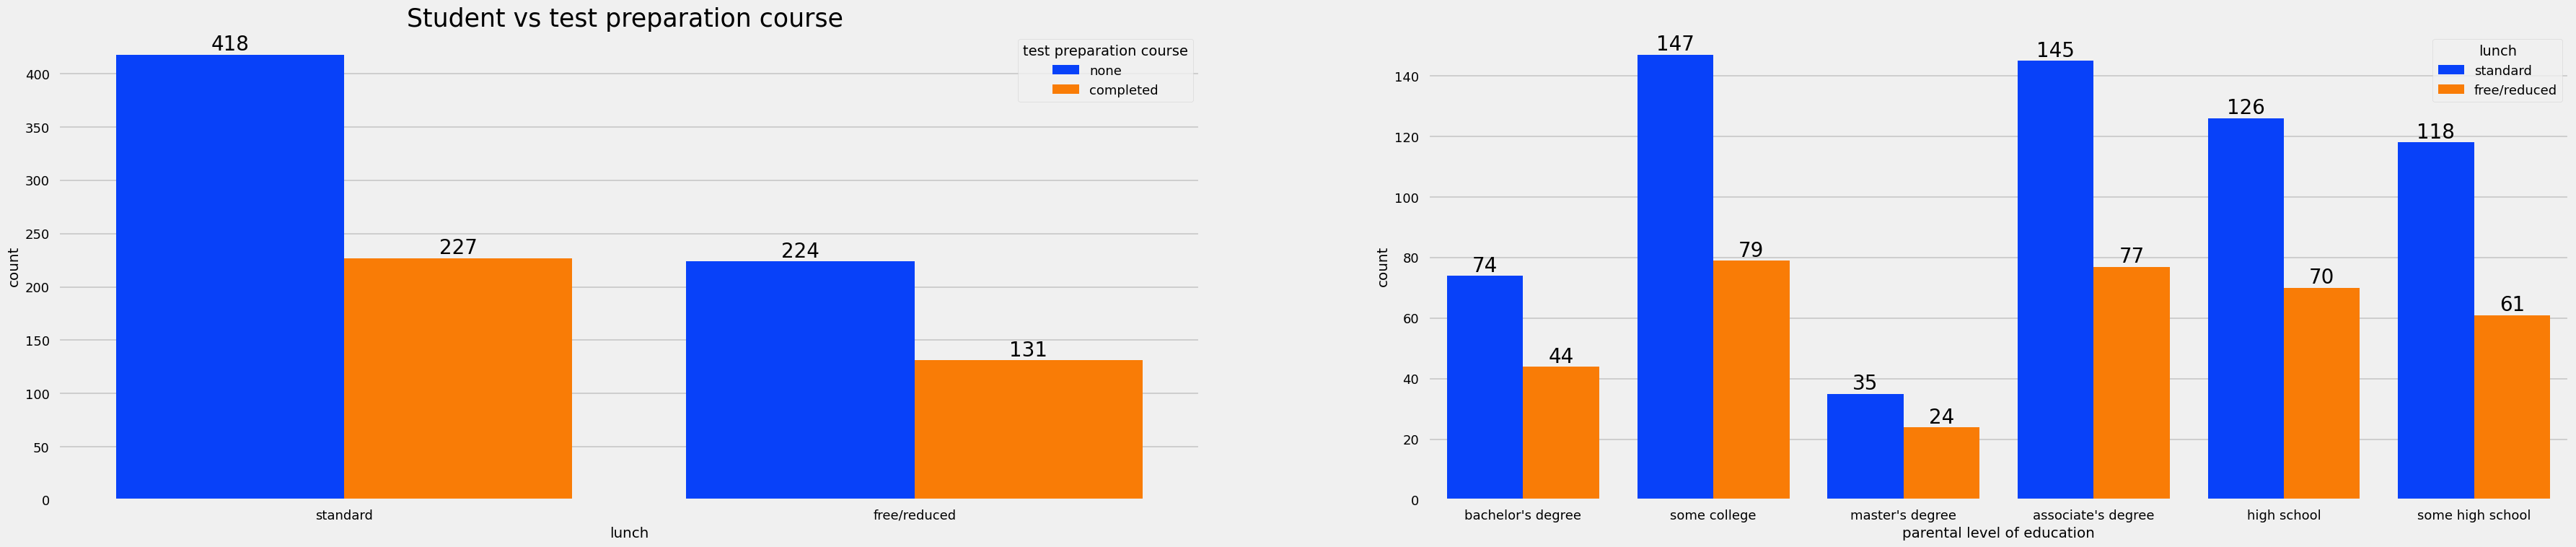

In [82]:
# Bivariate analysis (Impact of Lunch program on student perforance)

f,ax=plt.subplots(1,2,figsize=(40,8))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Student vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  
    

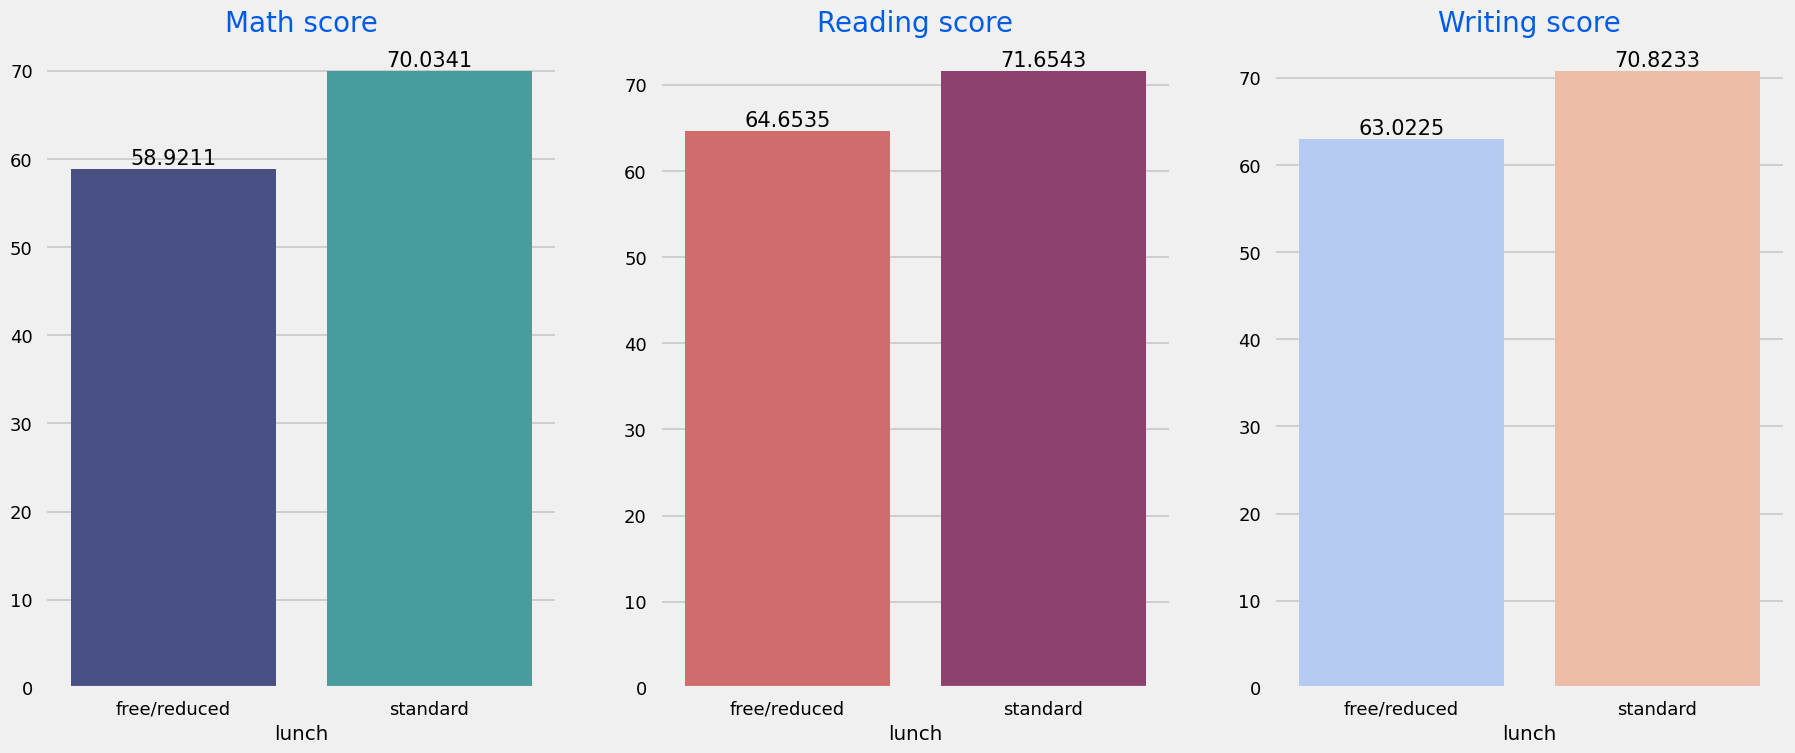

In [84]:
Group_data4=df.groupby('lunch')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data4['math score'].mean().index,y=Group_data4['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['reading score'].mean().index,y=Group_data4['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['writing score'].mean().index,y=Group_data4['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
 - Students on the standard lunch program tend to perform better overall

### 4.4.5 Test Preparation Course

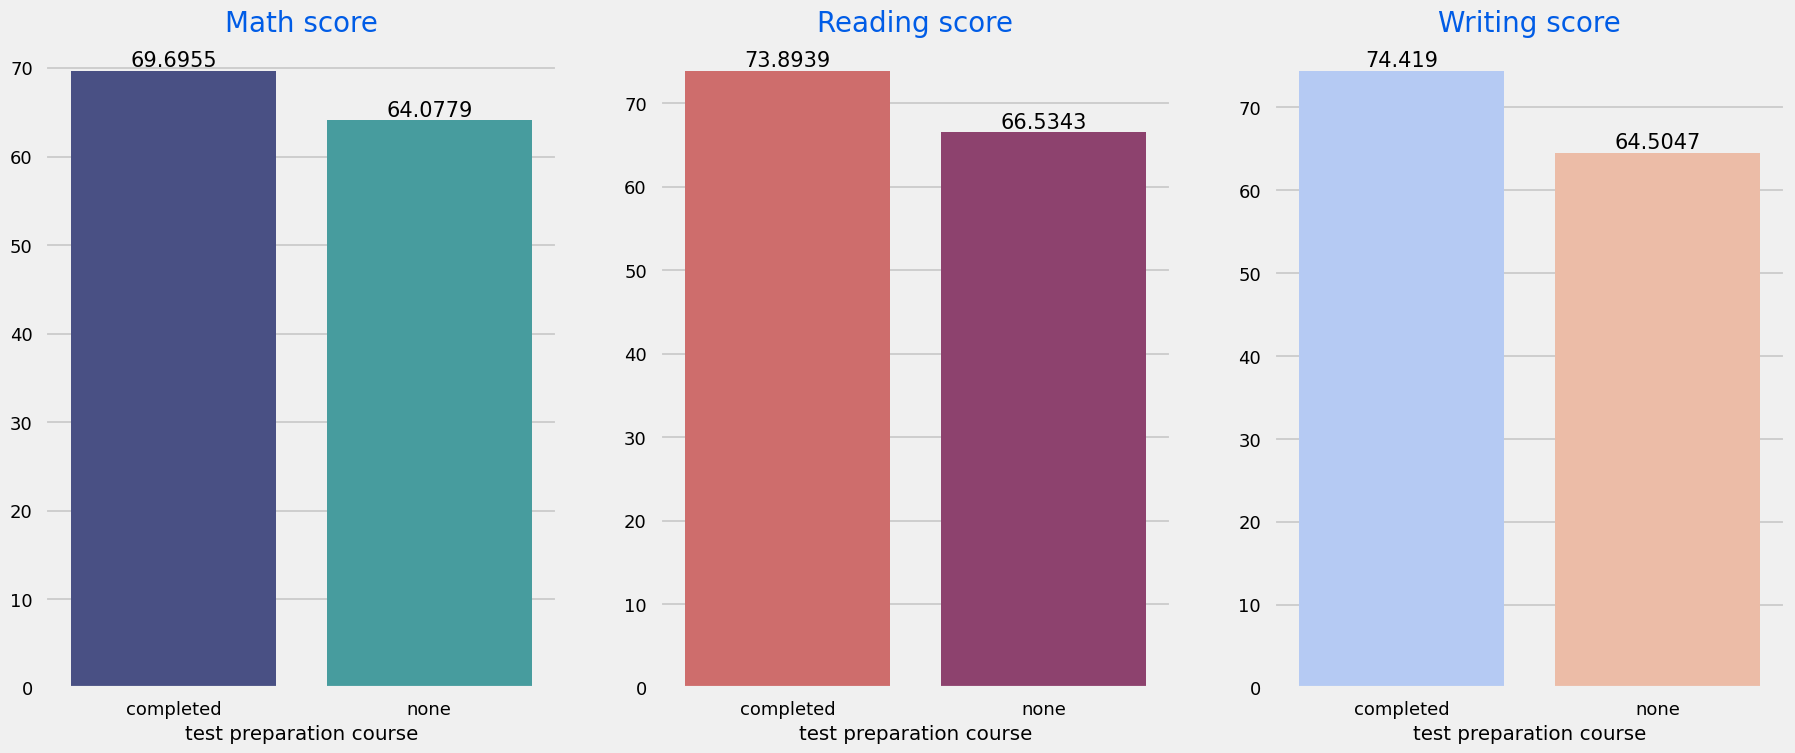

In [86]:
# Bivariate Analysis

Group_data5=df.groupby('test preparation course')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data5['math score'].mean().index,y=Group_data5['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data5['reading score'].mean().index,y=Group_data5['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data5['writing score'].mean().index,y=Group_data5['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
 - Students who have completed a test preparation course have performed better overall

### 4.4.6 Outlier Analysis

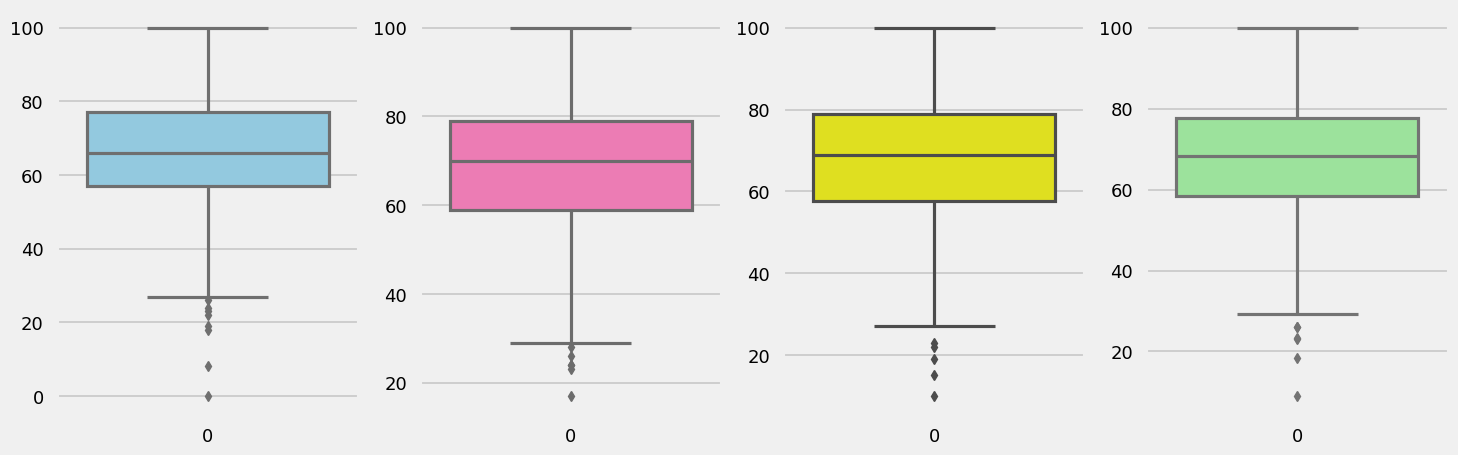

In [87]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

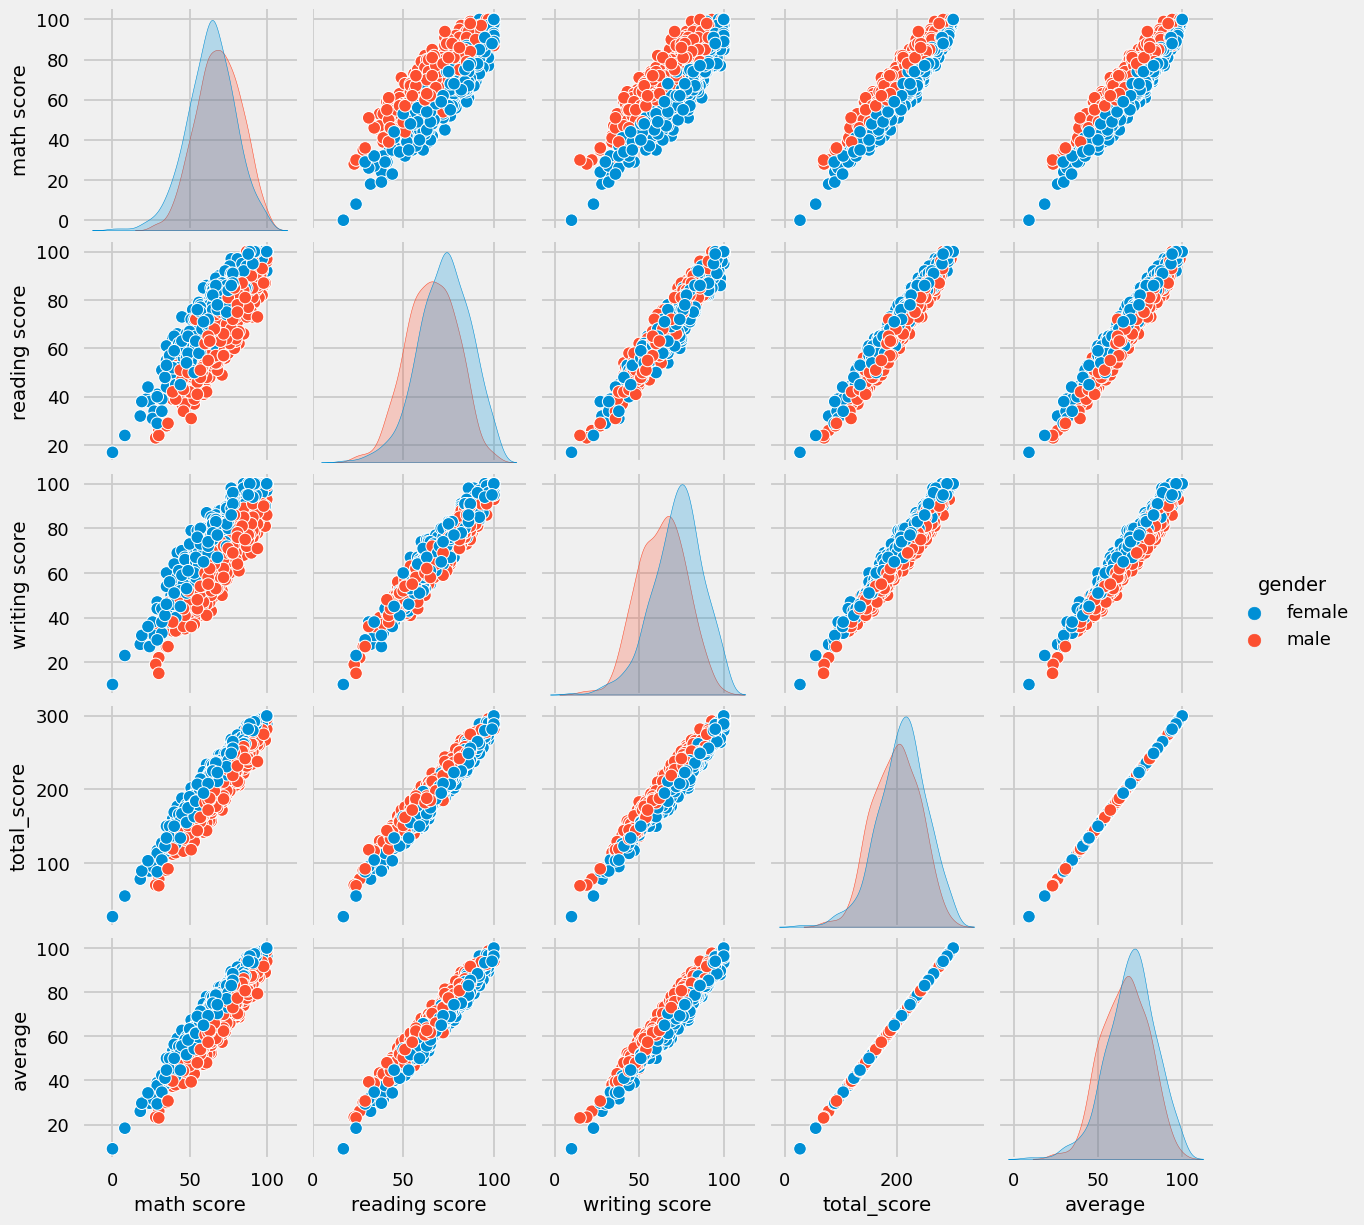

In [88]:
# Multivariate Analysis

sns.pairplot(df,hue = 'gender')
plt.show()

**Conclusions**

 - Student's Performance is related with lunch, race, parental level education
 - Females lead in pass percentage and also are top-scorers
 - Student's Performance is not much related with test preparation course
 - Finishing preparation course is benefitial.